In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [211]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import sklearn as sk
import matplotlib as mpl
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score,f1_score,accuracy_score
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import svm, model_selection,tree, linear_model, neighbors, naive_bayes, ensemble 
from sklearn import discriminant_analysis, gaussian_process

In [3]:
X=pd.read_csv('E:\data science (self)\IMARTICUS\projects\h1n1_vaccine_prediction.csv')

Text(0.5, 1.0, 'histogram')

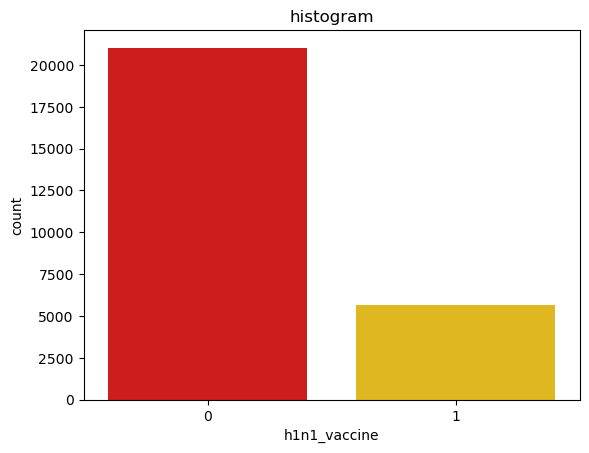

In [220]:
sns.countplot(x='h1n1_vaccine',data=X,palette='hot')
plt.title('histogram')

In [4]:
X.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [7]:
X.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [90]:
X['census_msa']

0        2
1        0
2        0
3        1
4        0
        ..
26702    2
26703    1
26704    0
26705    2
26706    1
Name: census_msa, Length: 26707, dtype: int32

In [8]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [9]:
X.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

### Columns 'health_insurance' contains too many NULLs

######  close to half the values of the column are NULL so discarding

In [14]:
X.drop('has_health_insur',axis=1,inplace = True)

In [15]:
X.isnull().sum()

unique_id                       0
h1n1_worry                     92
h1n1_awareness                116
antiviral_medication           71
contact_avoidance             208
bought_face_mask               19
wash_hands_frequently          42
avoid_large_gatherings         87
reduced_outside_home_cont      82
avoid_touch_face              128
dr_recc_h1n1_vacc            2160
dr_recc_seasonal_vacc        2160
chronic_medic_condition       971
cont_child_undr_6_mnths       820
is_health_worker              804
is_h1n1_vacc_effective        391
is_h1n1_risky                 388
sick_from_h1n1_vacc           395
is_seas_vacc_effective        462
is_seas_risky                 514
sick_from_seas_vacc           537
age_bracket                     0
qualification                1407
race                            0
sex                             0
income_level                 4423
marital_status               1408
housing_status               2042
employment                   1463
census_msa    

#### Firstly Analyzing the number of people who took each vaccine

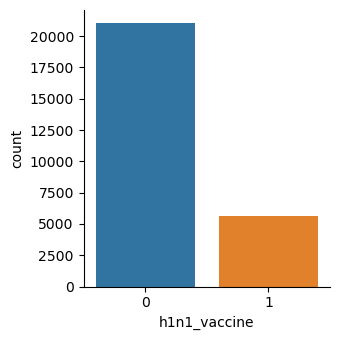

In [17]:
sns.factorplot('h1n1_vaccine',data=X,kind='count',size = 3.5)

#### Next Finding the categorical features present in the data

In [18]:
str_cols = X.select_dtypes(include = 'object').columns
X[str_cols].head()

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City"
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City"
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City"
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City"


##### There are 10 categorical features!

### Replacing  the NULLs with suitable substitutes

##### P.S: All Categorical features which are NULL are substituted with the mode of data, and the Numeric features with NULLs are substituted with the means

In [ ]:
# All the NULL values are replaced with the mode

In [21]:
for col in X.columns:
    if X[col].isnull().sum() and X[col].dtypes != 'object':
        X[col].loc[(X[col].isnull())] = X[col].median()

In [22]:
for col in X.columns:
    if X[col].isnull().sum() and X[col].dtypes == 'object':
        X[col].loc[(X[col].isnull())] = X[col].mode().max()

In [23]:
X.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vac

In [24]:
LE = LabelEncoder()
for col in str_cols:
    X[col] = LE.fit_transform(X[col]) # Converts to int64

In [25]:
X[str_cols].head()

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
0,3,1,3,0,2,1,0,1,2
1,1,0,3,1,2,1,1,0,0
2,0,2,3,1,0,1,0,0,0
3,4,0,3,0,2,1,1,1,1
4,2,3,3,0,0,0,0,0,0


#### Plotting Correlation Maps with the set of Encoded and Null Populated Features

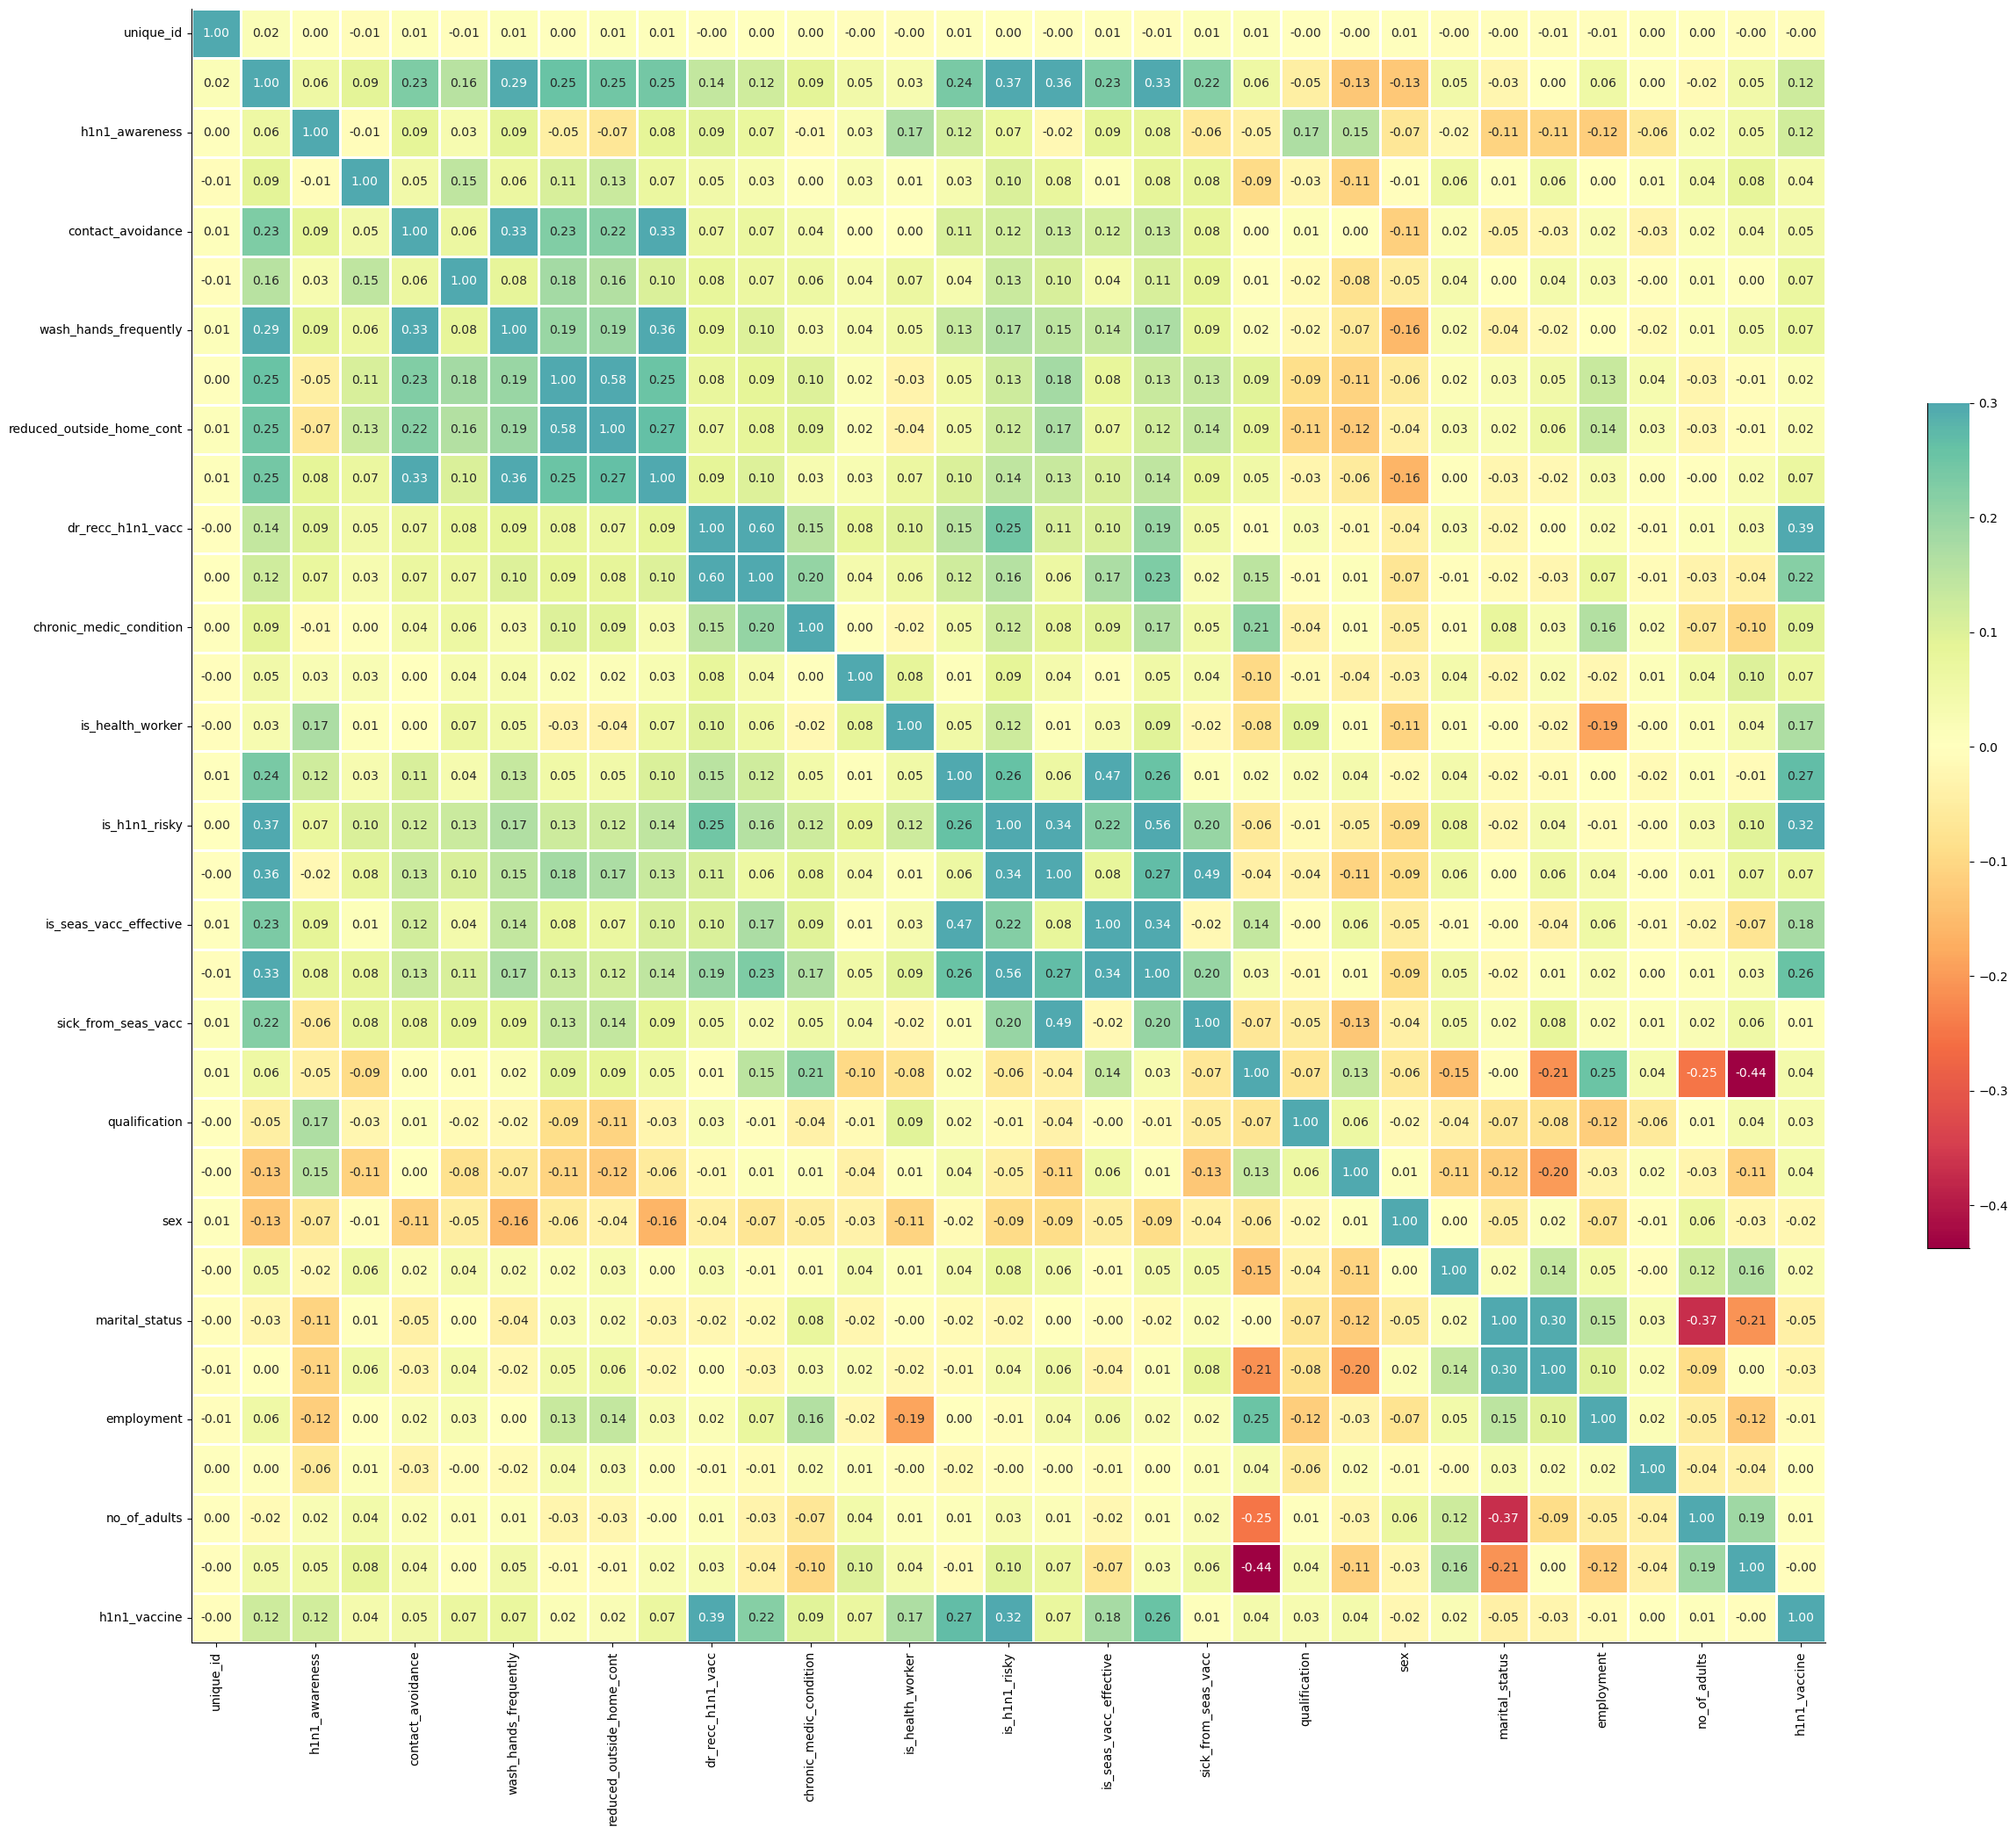

In [26]:
corr = X.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=1, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='Spectral')
sns.despine()
g.figure.set_size_inches(30,25)
    
plt.show()

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'is_h1n1_vacc_effective', 'is_h1n1_risky',
       'sick_from_h1n1_vacc', 'is_seas_vacc_effective', 'is_seas_risky',
       'sick_from_seas_vacc', 'age_bracket', 'qualification', 'race', 'sex',
       'income_level', 'marital_status', 'housing_status', 'employment',
       'census_msa', 'no_of_adults', 'no_of_children', 'h1n1_vaccine'],
      dtype='object')

#### Now Plotting the Heatmap of all the Categorical features which were label encoded for a better idea

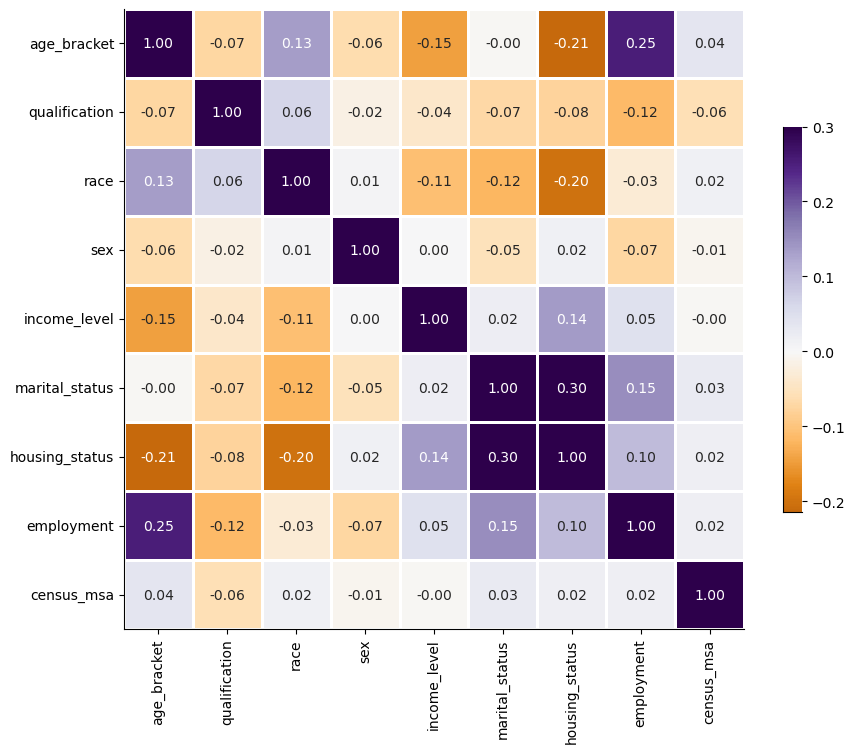

In [37]:
datum = X[str_cols]
corr = datum.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=1, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='PuOr')
sns.despine()
g.figure.set_size_inches(10,10)
    
plt.show()

In [81]:
def vaccination_rate_plot(col, target, X, ax=None):
    """Stacked bar chart of vaccination rate for `target` against 
    `col`. 
    
    Args:
        col (string): column name of feature variable
        target (string): column name of target variable
        data (pandas DataFrame): dataframe that contains columns 
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes 
            object to attach plot to
    """
    counts = (X[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()
    
cols_to_plot = [
     'no_of_adults','sick_from_h1n1_vacc',
       'no_of_children', 'age_bracket', 'qualification', 'race',
       'sex', 'income_level', 'marital_status',
       'housing_status', 'employment',
       'census_msa'
       
]

fig, ax = plt.subplots(
    len(cols_to_plot), 2, figsize=(9,len(cols_to_plot)*2.5)
) 

for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(
        col, 'h1n1_vaccine', X, ax=ax[idx, 0]
    )
    
ax[0, 0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine'
)

fig.tight_layout()

In [84]:
import seaborn as sns
from sns import factorial
sns.factorplot('sex',data=X,kind='count',size = 3.5)

sns.factorplot('h1n1_worry',kind = 'count',data = X)



ModuleNotFoundError: No module named 'sns'

In [74]:
X.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vac

In [ ]:
X=replace_cat_feature(X,null)

In [193]:
X.h1n1_awareness.mod()

0        0.0
1        2.0
2        1.0
3        1.0
4        1.0
        ... 
26702    0.0
26703    2.0
26704    2.0
26705    1.0
26706    0.0
Name: h1n1_awareness, Length: 26707, dtype: float64

In [200]:
X['h1n1_awareness'].mode()

0    1.0
Name: h1n1_awareness, dtype: float64

In [184]:
df(X["h1n1_awareness"].value_counts())

,h1n1_awareness
1.0,14598
2.0,9487
0.0,2506


In [199]:
X['h1n1_awareness'].mode()

0    1.0
Name: h1n1_awareness, dtype: float64

In [201]:
X['is_h1n1_vacc_effective'].mode()

0    4.0
Name: is_h1n1_vacc_effective, dtype: float64

In [202]:
X['is_h1n1_vacc_effective'].median()

4.0

In [217]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline

Text(0.5, 1.0, 'histogram')

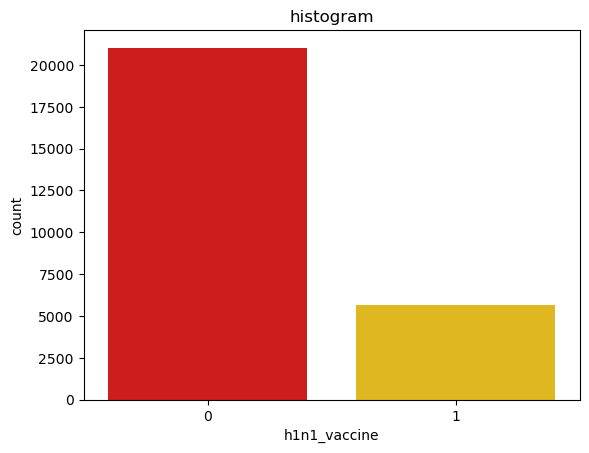

In [218]:
sns.countplot(x='h1n1_vaccine',data=X,palette='hot')
plt.title('histogram')